### Importation de packages nécessaires

In [97]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Chargement des données

In [75]:
df_vent_mensuel_final = pd.read_csv("df_vent_mensuel_final.csv")

In [76]:
df_vent_mensuel_final.shape

(5386535, 18)

*Le dataframe contient ainsi 5 386 535 lignes, résultantes de l'agrégation à la maille (commune, mois)*

In [77]:
df_vent_mensuel_final.tail(5)

,INSEE_COM,date_mois,wind_speed_10m_mean,wind_speed_10m_max,wind_speed_10m_min,wind_speed_10m_std,wind_speed_100m_mean,wind_speed_100m_max,wind_speed_100m_min,wind_speed_100m_std,wind_speed_10m_neutral_mean,wind_speed_10m_neutral_max,wind_speed_10m_neutral_min,wind_speed_10m_neutral_std,gust_mean,gust_max,gust_min,gust_std
5386530,95690,2024-12-01,8.211587,10.862511,6.908456,1.959990,13.048806,16.560163,11.254635,2.883314,8.157269,10.847654,6.844833,1.990794,16.047083,20.970055,13.116677,3.938996
5386531,95690,2025-01-01,8.360559,11.352139,6.560353,2.745049,13.423950,17.943642,10.927737,4.282795,8.285457,11.291422,6.506045,2.897186,15.958603,24.977722,12.860877,5.290032
5386532,95690,2025-02-01,5.202367,8.503615,3.697347,2.210929,9.042304,13.240458,7.151252,3.337020,5.071118,8.503920,3.521399,2.269024,10.104214,15.855311,6.812317,3.707686
5386533,95690,2025-04-01,5.331284,7.731738,3.618321,1.754094,8.877629,11.364437,6.541815,2.205848,5.242274,7.744555,3.342547,1.950545,10.549831,15.062020,6.671673,3.912545
5386534,95690,2025-05-01,5.203705,6.142421,4.316271,0.978277,7.971771,9.601190,7.560208,1.999986,5.271409,6.326256,4.219099,1.222393,10.636103,13.090467,8.178054,2.954555


In [78]:
# Colonnes à exclure
colonnes_a_exclure = ['INSEE_COM', 'date_mois']

# Création d'une liste des colonnes de vitesses en excluant les colonnes spécifiées
variables_speed = [col for col in df_vent_mensuel_final.columns if col not in colonnes_a_exclure]

# Conversion de toutes les vitesses en km/h
for column in variables_speed:
    df_vent_mensuel_final[column] = df_vent_mensuel_final[column] * 3.6  # Conversion de m/s à km/h

In [79]:
df_vent_mensuel_final.head(5)

,INSEE_COM,date_mois,wind_speed_10m_mean,wind_speed_10m_max,wind_speed_10m_min,wind_speed_10m_std,wind_speed_100m_mean,wind_speed_100m_max,wind_speed_100m_min,wind_speed_100m_std,wind_speed_10m_neutral_mean,wind_speed_10m_neutral_max,wind_speed_10m_neutral_min,wind_speed_10m_neutral_std,gust_mean,gust_max,gust_min,gust_std
0,1001,2012-02-01,23.952411,28.853831,20.865396,5.086741,38.182270,43.028503,31.756874,8.266785,23.952605,29.007709,20.925386,5.294684,50.686831,62.629294,43.131370,11.091308
1,1001,2012-03-01,22.101552,28.128050,16.770656,6.870641,36.334969,42.447092,31.091731,9.843048,22.018278,28.282923,16.423617,7.350219,46.323692,60.059743,35.044744,13.047485
2,1001,2012-04-01,25.546624,36.423889,16.396623,9.478986,43.423417,59.461920,29.572585,13.307300,25.298609,36.340877,16.095935,9.779366,54.232443,75.094607,32.332738,22.073609
3,1001,2012-05-01,19.164171,23.829851,14.490965,6.219546,30.460984,40.157006,23.761835,11.054291,19.195931,24.151303,14.327430,6.564063,40.353598,52.429734,31.736225,12.912159
4,1001,2012-06-01,16.636466,31.374774,11.142015,8.683749,27.909574,46.945872,15.543423,11.446064,16.672323,31.583779,11.713745,9.553660,35.154740,70.200216,24.140218,19.897333


#### Variables de Vitesse du Vent

- **wind_speed_10m_mean** : La vitesse moyenne du vent mesurée à 10 mètres de hauteur.
- **wind_speed_10m_max** : La vitesse maximale du vent enregistrée à 10 mètres de hauteur.
- **wind_speed_10m_min** : La vitesse minimale du vent mesurée à 10 mètres de hauteur.
- **wind_speed_10m_std** : L'écart type de la vitesse du vent à 10 mètres, qui indique la variation des vitesses par rapport à la moyenne.

- **wind_speed_100m_mean** : La vitesse moyenne du vent mesurée à 100 mètres de hauteur.
- **wind_speed_100m_max** : La vitesse maximale du vent enregistrée à 100 mètres de hauteur.
- **wind_speed_100m_min** : La vitesse minimale du vent mesurée à 100 mètres de hauteur.
- **wind_speed_100m_std** : L'écart type de la vitesse du vent à 100 mètres.

- **wind_speed_10m_neutral_mean** : La vitesse moyenne du vent à 10 mètres dans des conditions neutres (sans influence extérieure).
- **wind_speed_10m_neutral_max** : La vitesse maximale du vent à 10 mètres dans des conditions neutres.
- **wind_speed_10m_neutral_min** : La vitesse minimale du vent à 10 mètres dans des conditions neutres.
- **wind_speed_10m_neutral_std** : L'écart type de la vitesse du vent à 10 mètres dans des conditions neutres.


In [80]:
df_vent_mensuel_final.isna().sum()

INSEE_COM                      0
date_mois                      0
wind_speed_10m_mean            0
wind_speed_10m_max             0
wind_speed_10m_min             0
wind_speed_10m_std             0
wind_speed_100m_mean           0
wind_speed_100m_max            0
wind_speed_100m_min            0
wind_speed_100m_std            0
wind_speed_10m_neutral_mean    0
wind_speed_10m_neutral_max     0
wind_speed_10m_neutral_min     0
wind_speed_10m_neutral_std     0
gust_mean                      0
gust_max                       0
gust_min                       0
gust_std                       0
dtype: int64

### Affichage des communes distinctes sur la carte de la France

In [81]:
# Nombre total de communes distinctes détectées dans notre dataframe 

df_vent_mensuel_final["INSEE_COM"].nunique()

33745

In [82]:
# Obtenir la liste complète des éléments uniques dans INSEE_COM qui ont 4 positions

liste_unique_quatre_positions = df_vent_mensuel_final[df_vent_mensuel_final['INSEE_COM'].astype(str).str.len() == 4]['INSEE_COM'].unique()

# Convertir le résultat en liste pour un affichage plus facile

liste_unique_quatre_positions = liste_unique_quatre_positions.tolist()

print("Liste des éléments uniques dans INSEE_COM où la longueur est de 4 positions :")
print(liste_unique_quatre_positions)

Liste des éléments uniques dans INSEE_COM où la longueur est de 4 positions :
[1001, 1002, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1019, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1049, 1050, 1051, 1052, 1053, 1054, 1056, 1057, 1058, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1087, 1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1121, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1133, 1134, 1135, 1136, 1138, 1139, 1140, 1141, 1142, 1143, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1155, 1156, 1157, 1158, 1159, 1160, 1162, 1163, 1165, 1166, 1167, 1169, 1170, 1171, 1173, 1174, 1175, 1177, 1179, 118

In [83]:
# Nombre de valeurs uniques dans INSEE_COM qui ont 4 positions

len(liste_unique_quatre_positions)

3090

*On constate que 102 communes dans notre dataframe sont sur 4 positions, ce qui n'est pas normal.*

*La variable "INSEE_COM" doit être sur 5 positions, ce qui laisse penser qu'il y a eu un problème de formatage.*

*En effet, il faut ajouter un "0" derrière chaque code qui compte 4 positions.*

In [84]:
# Normaliser les valeurs

df_vent_mensuel_final['INSEE_COM'] = df_vent_mensuel_final['INSEE_COM'].astype(str).str.strip()

In [85]:
df_vent_mensuel_final["INSEE_COM"] = [code.zfill(5) for code in df_vent_mensuel_final["INSEE_COM"] ] # Remplissage avec un "0"

Nombre de communes détectées : 33745


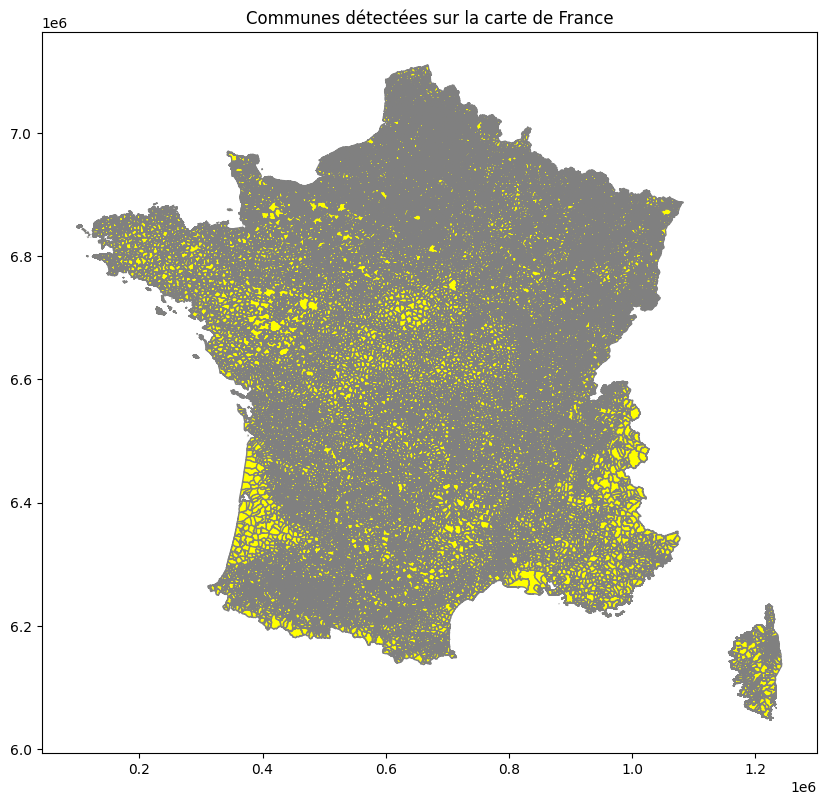

In [86]:
# Charger le shapefile des communes françaises
communes = gpd.read_file('shapefile_commune/COMMUNE.shp')  

# Filtrer les communes en fonction des codes INSEE
communes_filtered = communes[communes['INSEE_COM'].isin(df_vent_mensuel_final['INSEE_COM'])]

# Vérifier le nombre de communes filtrées
nombre_communes = len(communes_filtered)
print(f"Nombre de communes détectées : {nombre_communes}")

# Créer une carte
fig, ax = plt.subplots(figsize=(10, 10))
communes.plot(ax=ax, color='yellow', edgecolor='grey')  # Carte de fond
#if not communes_filtered.empty:
    #communes_filtered.plot(ax=ax, color='white')  # Communes 

plt.title('Communes détectées sur la carte de France')
plt.show()

### Analyse descriptive des données

In [105]:
# Agrégation par région (ou département)
df_vent_mensuel_final['region'] = df_vent_mensuel_final['INSEE_COM'].apply(lambda x: x[:2])  # Exemple : extraire les 2 premiers caractères pour créer une région fictive
aggregated_data = df_vent_mensuel_final.groupby(['region', 'date_mois']).agg({
    'wind_speed_10m_mean': 'mean',
    'wind_speed_10m_max': 'max',
    'wind_speed_10m_min': 'min',
}).reset_index()

In [107]:
# Statistiques descriptives
stats = aggregated_data.describe()
print(stats)

       wind_speed_10m_mean  wind_speed_10m_max  wind_speed_10m_min
count         15039.000000        15039.000000        15039.000000
mean             22.067282           36.453658           12.298863
std               6.112072            9.375375            5.493606
min               4.929786           11.045788            0.888917
25%              17.880392           29.942693            8.283694
50%              21.948477           35.253976           12.238319
75%              26.092414           41.516235           15.999992
max              46.109846          101.682338           30.797071


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphiques linéaires agrégés
plt.figure(figsize=(12, 6))
for region in aggregated_data['region'].unique():
    subset = aggregated_data[aggregated_data['region'] == region]
    plt.plot(subset['date_mois'], subset['wind_speed_10m_mean'], label=region)

plt.title('Vitesse Moyenne du Vent par Région')
plt.xlabel('Mois')
plt.ylabel('Vitesse du Vent (m/s)')
plt.legend()
plt.show()

# Boxplots par région
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_data, x='region', y='wind_speed_10m_mean')
plt.title('Distribution de la Vitesse du Vent par Région')
plt.xlabel('Région')
plt.ylabel('Vitesse du Vent (m/s)')
plt.xticks(rotation=45)
plt.show()

In [106]:
df_vent_mensuel_final

,INSEE_COM,date_mois,wind_speed_10m_mean,wind_speed_10m_max,wind_speed_10m_min,wind_speed_10m_std,wind_speed_100m_mean,wind_speed_100m_max,wind_speed_100m_min,wind_speed_100m_std,wind_speed_10m_neutral_mean,wind_speed_10m_neutral_max,wind_speed_10m_neutral_min,wind_speed_10m_neutral_std,gust_mean,gust_max,gust_min,gust_std,region
0,01001,2012-02-01,23.952411,28.853831,20.865396,5.086741,38.182270,43.028503,31.756874,8.266785,23.952605,29.007709,20.925386,5.294684,50.686831,62.629294,43.131370,11.091308,01
1,01001,2012-03-01,22.101552,28.128050,16.770656,6.870641,36.334969,42.447092,31.091731,9.843048,22.018278,28.282923,16.423617,7.350219,46.323692,60.059743,35.044744,13.047485,01
2,01001,2012-04-01,25.546624,36.423889,16.396623,9.478986,43.423417,59.461920,29.572585,13.307300,25.298609,36.340877,16.095935,9.779366,54.232443,75.094607,32.332738,22.073609,01
3,01001,2012-05-01,19.164171,23.829851,14.490965,6.219546,30.460984,40.157006,23.761835,11.054291,19.195931,24.151303,14.327430,6.564063,40.353598,52.429734,31.736225,12.912159,01
4,01001,2012-06-01,16.636466,31.374774,11.142015,8.683749,27.909574,46.945872,15.543423,11.446064,16.672323,31.583779,11.713745,9.553660,35.154740,70.200216,24.140218,19.897333,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386530,95690,2024-12-01,29.561714,39.105040,24.870442,7.055964,46.975702,59.616587,40.516686,10.379932,29.366167,39.051554,24.641399,7.166859,57.769500,75.492198,47.220037,14.180384,95
5386531,95690,2025-01-01,30.098011,40.867700,23.617271,9.882176,48.326221,64.597111,39.339853,15.418064,29.827647,40.649119,23.421763,10.429870,57.450973,89.919799,46.299157,19.044115,95
5386532,95690,2025-02-01,18.728520,30.613014,13.310449,7.959343,32.552296,47.665649,25.744508,12.013270,18.256025,30.614112,12.677035,8.168488,36.375171,57.079120,24.524341,13.347668,95
5386533,95690,2025-04-01,19.192621,27.834257,13.025956,6.314737,31.959464,40.911973,23.550534,7.941053,18.872188,27.880400,12.033171,7.021961,37.979392,54.223272,24.018023,14.085162,95


In [87]:
# Statistiques descriptives
stats = df_vent_mensuel_final.describe()
print("Statistiques descriptives :")
stats

Statistiques descriptives :


,wind_speed_10m_mean,wind_speed_10m_max,wind_speed_10m_min,wind_speed_10m_std,wind_speed_100m_mean,wind_speed_100m_max,wind_speed_100m_min,wind_speed_100m_std,wind_speed_10m_neutral_mean,wind_speed_10m_neutral_max,wind_speed_10m_neutral_min,wind_speed_10m_neutral_std,gust_mean,gust_max,gust_min,gust_std
count,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06,5.386535e+06
mean,2.228919e+01,3.113005e+01,1.575741e+01,6.880964e+00,3.596413e+01,4.812892e+01,2.732696e+01,1.035479e+01,2.211555e+01,3.122497e+01,1.522236e+01,7.403274e+00,4.703968e+01,6.734078e+01,3.267841e+01,1.496583e+01
std,6.546594e+00,8.220808e+00,5.784963e+00,2.036195e+00,9.726768e+00,1.222438e+01,8.654590e+00,2.889683e+00,6.628062e+00,8.122326e+00,6.095170e+00,1.979222e+00,1.107945e+01,1.475116e+01,1.020635e+01,3.657983e+00
min,3.917807e+00,5.957581e+00,8.889169e-01,1.246707e+00,5.348382e+00,8.750466e+00,1.326839e+00,1.604146e+00,2.222072e+00,5.225955e+00,2.579736e-01,1.370672e+00,1.507029e+01,2.278921e+01,8.218369e+00,4.517738e+00
25%,1.795806e+01,2.571795e+01,1.182069e+01,5.527177e+00,2.946869e+01,3.968789e+01,2.167309e+01,8.405461e+00,1.784287e+01,2.590124e+01,1.125224e+01,6.086194e+00,3.865529e+01,5.611684e+01,2.506548e+01,1.241554e+01
50%,2.209406e+01,3.070989e+01,1.547561e+01,6.628213e+00,3.592369e+01,4.749555e+01,2.729550e+01,9.941693e+00,2.196350e+01,3.080629e+01,1.505874e+01,7.170225e+00,4.634469e+01,6.621256e+01,3.166631e+01,1.441671e+01
75%,2.643573e+01,3.618807e+01,1.943159e+01,7.975178e+00,4.243750e+01,5.616086e+01,3.296943e+01,1.188845e+01,2.629379e+01,3.618124e+01,1.910472e+01,8.472845e+00,5.437901e+01,7.713871e+01,3.911626e+01,1.694361e+01
max,6.533115e+01,1.016823e+02,5.268223e+01,2.386859e+01,8.266672e+01,1.304214e+02,6.639009e+01,2.990567e+01,6.581251e+01,1.020390e+02,5.321138e+01,2.388689e+01,1.133780e+02,1.599082e+02,9.542704e+01,4.438791e+01


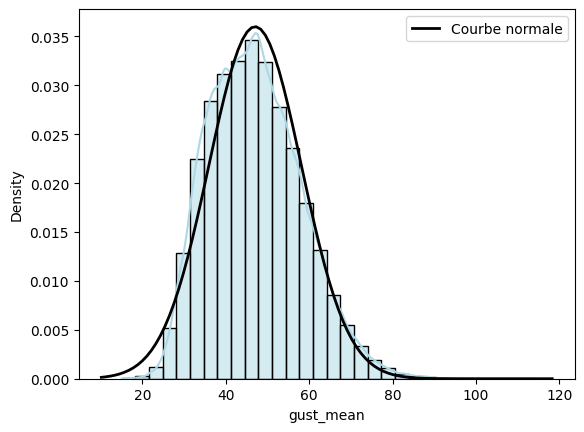

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df_vent_mensuel_final est votre DataFrame
# df_vent_mensuel_final = ...

# Tracer l'histogramme avec la courbe de densité
sns.histplot(df_vent_mensuel_final["gust_mean"], bins=30, kde=True, stat='density', color='lightblue')

# Calculer la moyenne et l'écart type
mean = df_vent_mensuel_final["gust_mean"].mean()
std_dev = df_vent_mensuel_final["gust_mean"].std()

# Générer les valeurs pour la courbe normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Superposer la courbe normale
plt.plot(x, p, 'k', linewidth=2, label='Courbe normale')
plt.legend()

# Afficher le graphique
plt.show()

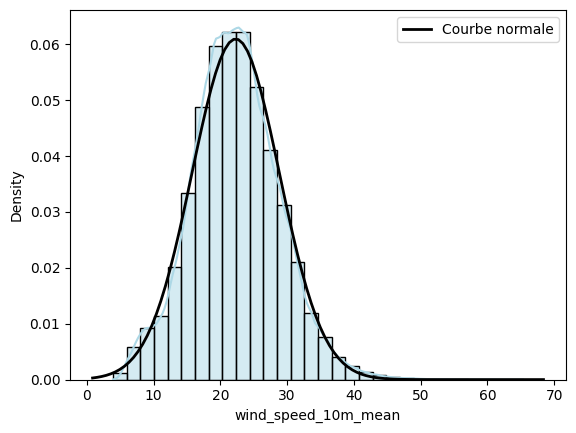

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df_vent_mensuel_final est votre DataFrame
# df_vent_mensuel_final = ...

# Tracer l'histogramme avec la courbe de densité
sns.histplot(df_vent_mensuel_final["wind_speed_10m_mean"], bins=30, kde=True, stat='density', color='lightblue')

# Calculer la moyenne et l'écart type
mean = df_vent_mensuel_final["wind_speed_10m_mean"].mean()
std_dev = df_vent_mensuel_final["wind_speed_10m_mean"].std()

# Générer les valeurs pour la courbe normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Superposer la courbe normale
plt.plot(x, p, 'k', linewidth=2, label='Courbe normale')
plt.legend()

# Afficher le graphique
plt.show()

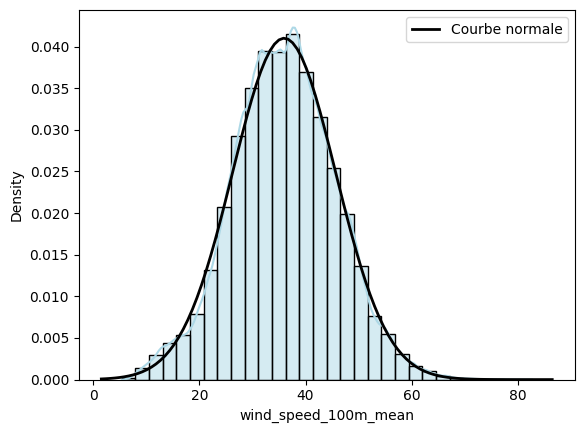

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df_vent_mensuel_final est votre DataFrame
# df_vent_mensuel_final = ...

# Tracer l'histogramme avec la courbe de densité
sns.histplot(df_vent_mensuel_final["wind_speed_100m_mean"], bins=30, kde=True, stat='density', color='lightblue')

# Calculer la moyenne et l'écart type
mean = df_vent_mensuel_final["wind_speed_100m_mean"].mean()
std_dev = df_vent_mensuel_final["wind_speed_100m_mean"].std()

# Générer les valeurs pour la courbe normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)

# Superposer la courbe normale
plt.plot(x, p, 'k', linewidth=2, label='Courbe normale')
plt.legend()

# Afficher le graphique
plt.show()

#### Valeurs extrêmes des variables

In [91]:
liste_variables = df_vent_mensuel_final.columns.tolist()

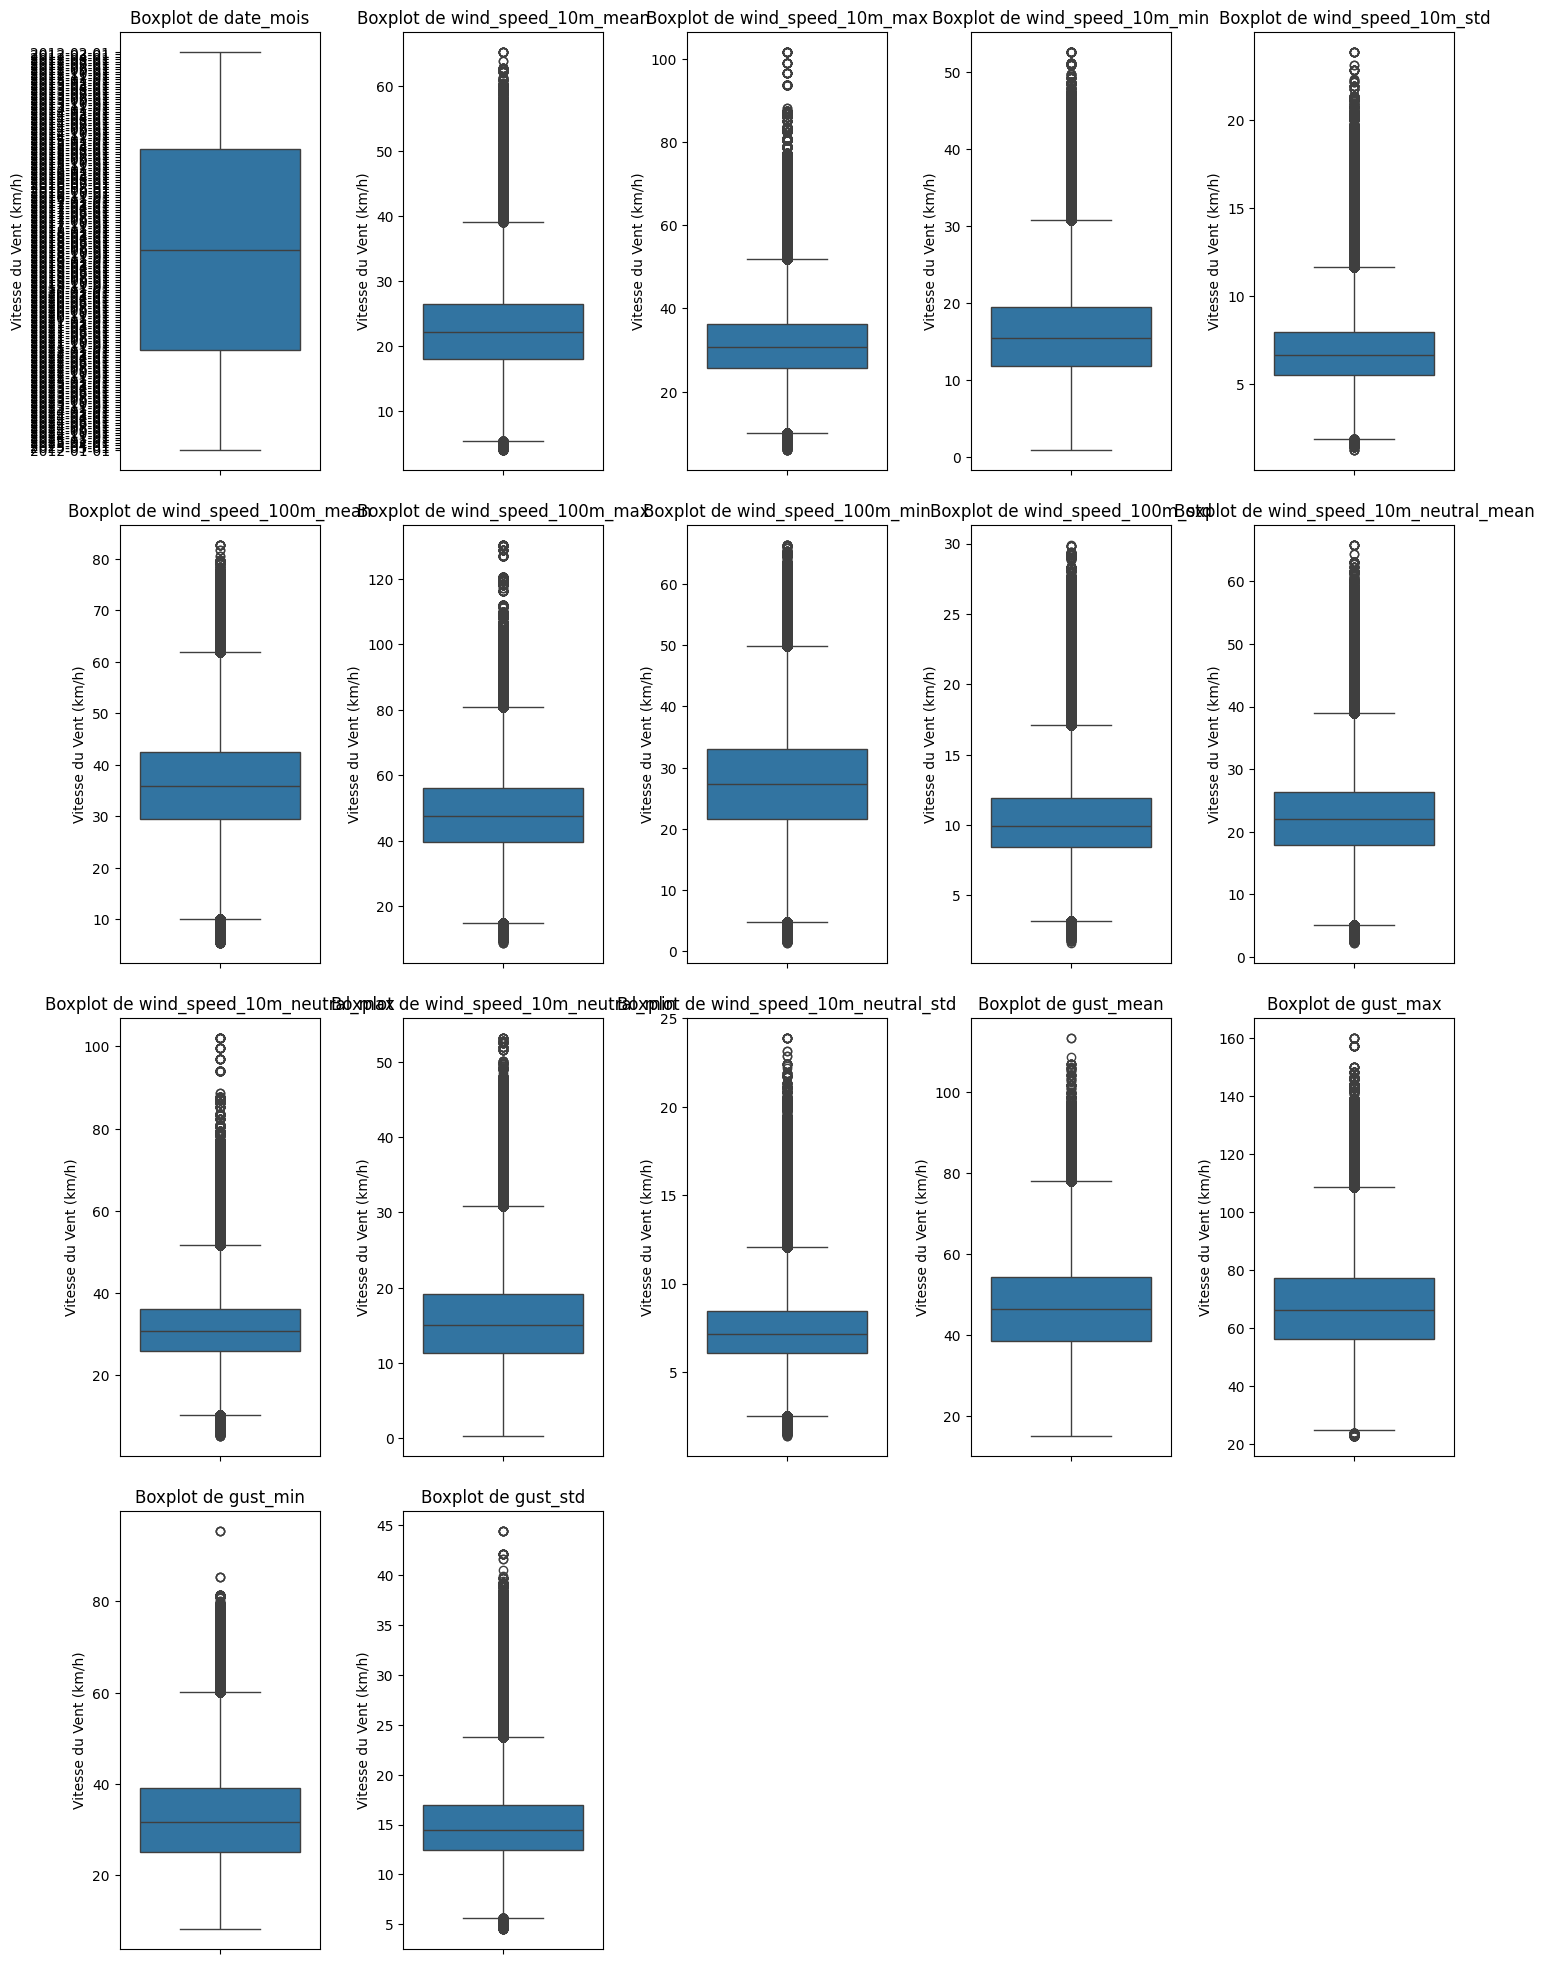

In [92]:
# Filtrer les variables pour exclure INSEE_COM et date
liste_variables_filtrée = [col for col in liste_variables if col not in ['INSEE_COM', 'date']]

# Initialiser la figure
n_cols = 5  # Nombre de graphiques par ligne
n_rows = (len(liste_variables_filtrée) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 5 * n_rows))  

# Créer un boxplot pour chaque colonne filtrée
for i, col in enumerate(liste_variables_filtrée):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(data=df_vent_mensuel_final, y=df_vent_mensuel_final[col])  
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Vitesse du Vent (km/h)')  
    plt.xlabel('')  

# Ajuster l'espacement
plt.tight_layout(pad=2.0) 
plt.show() 

*Cette étude des "valeurs aberrantes" n'a pas pour but de les traiter, car étant dans un contexte particulier d'étude des rafales/tempêtes, ces valeurs vues comme aberrantes sur le graphique peuvent représenter des valeurs extrêmes légitimes.*

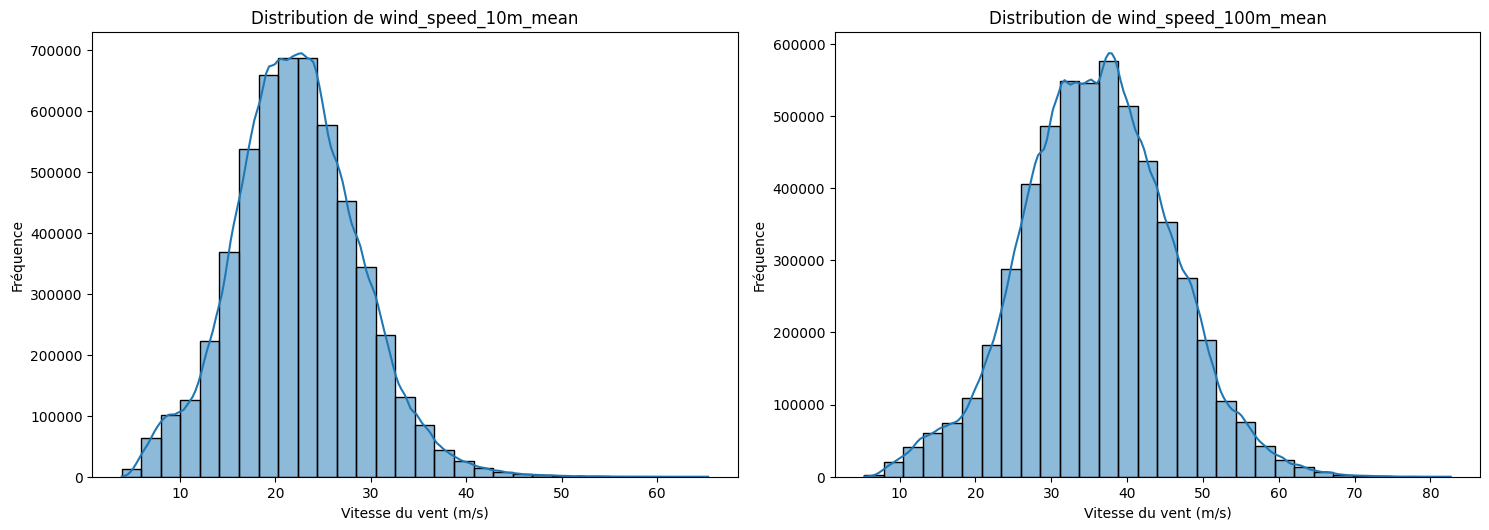

In [93]:
# Histogrammes pour les vitesses du vent à 10m
plt.figure(figsize=(15, 10))

for i, column in enumerate(['wind_speed_10m_mean', 'wind_speed_100m_mean']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_vent_mensuel_final[column], bins=30, kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel('Vitesse du vent (m/s)')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

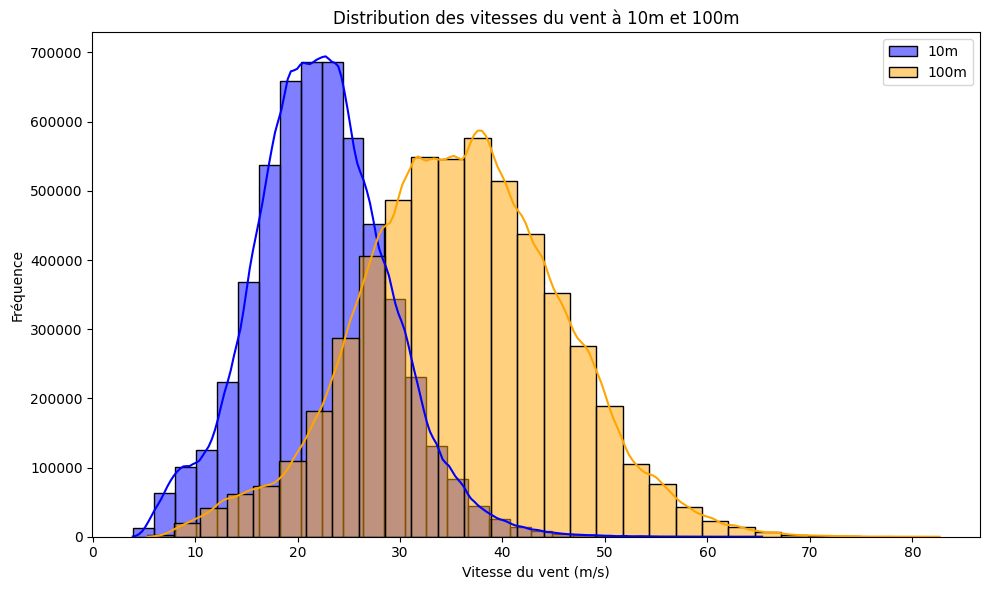

In [94]:
plt.figure(figsize=(10, 6))

# Superposition des histogrammes
sns.histplot(df_vent_mensuel_final['wind_speed_10m_mean'], bins=30, kde=True, color='blue', label='10m', alpha=0.5)
sns.histplot(df_vent_mensuel_final['wind_speed_100m_mean'], bins=30, kde=True, color='orange', label='100m', alpha=0.5)

plt.title('Distribution des vitesses du vent à 10m et 100m')
plt.xlabel('Vitesse du vent (m/s)')
plt.ylabel('Fréquence')
plt.legend() 
plt.legend() 
plt.tight_layout()
plt.show()

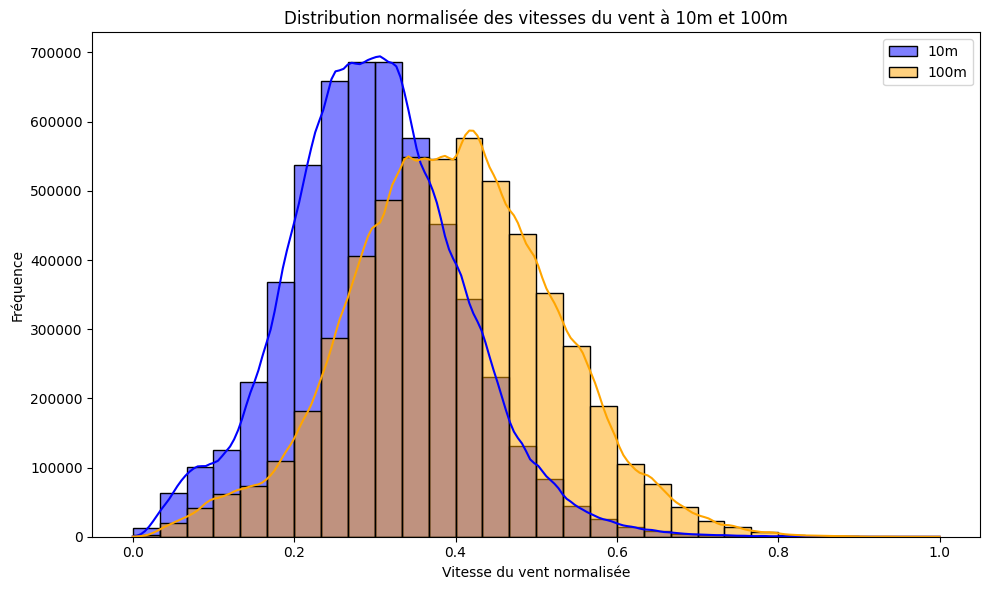

In [29]:
# Normalisation des données
scaler = MinMaxScaler()
df_vent_mensuel_final[['wind_speed_10m_mean', 'wind_speed_100m_mean']] = scaler.fit_transform(df_vent_mensuel_final[['wind_speed_10m_mean', 'wind_speed_100m_mean']])

# Réduction de la taille des figures
plt.figure(figsize=(10, 6))

# Superposition des histogrammes des données normalisées
sns.histplot(df_vent_mensuel_final['wind_speed_10m_mean'], bins=30, kde=True, color='blue', label='10m', alpha=0.5)
sns.histplot(df_vent_mensuel_final['wind_speed_100m_mean'], bins=30, kde=True, color='orange', label='100m', alpha=0.5)

plt.title('Distribution normalisée des vitesses du vent à 10m et 100m')
plt.xlabel('Vitesse du vent normalisée')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()
plt.show()

#### Analyse temporelle 

In [ ]:
# Convertir la colonne de dates en type datetime
df_vent_mensuel_final['date'] = pd.to_datetime(df_vent_mensuel_final['date'])

# Définir la colonne de dates comme index
df_vent_mensuel_final.set_index('date', inplace=True)

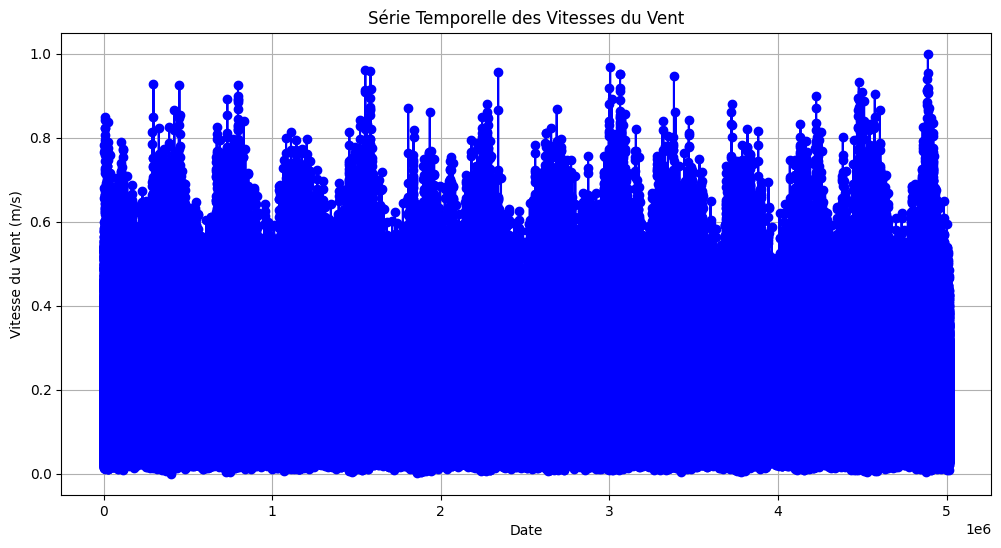

In [ ]:
# Série temporelle des vitesses du vent

plt.figure(figsize=(12, 6))
plt.plot(df_vent_mensuel_final.index, df_vent_mensuel_final['wind_speed_10m_mean'], marker='o', linestyle='-', color='b')
plt.title('Série Temporelle des Vitesses du Vent')
plt.xlabel('Date')
plt.ylabel('Vitesse du Vent (m/s)')
plt.grid()
plt.show()

In [ ]:
import plotly.express as px
import nbformat

# Créer un DataFrame avec les données nécessaires 
df_vent_mensuel_final['date'] = df_vent_mensuel_final.index  

# Créer le graphique interactif
fig = px.line(df_vent_mensuel_final, x=df_vent_mensuel_final.index, y='wind_speed_10m_mean', 
              title='Série Temporelle des Vitesses du Vent',
              labels={'wind_speed_10m_mean': 'Vitesse du Vent (m/s)', 'date': 'Date'})

# Afficher le graphique
fig.show()